In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Importing the dataset**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ShubhamAgr09/Training-Datasets/main/Social_Network_Ads.csv')

**ENCODING**

In [ ]:
df.Gender = df.Gender.map({'Male':1,'Female':0})

**EDA**

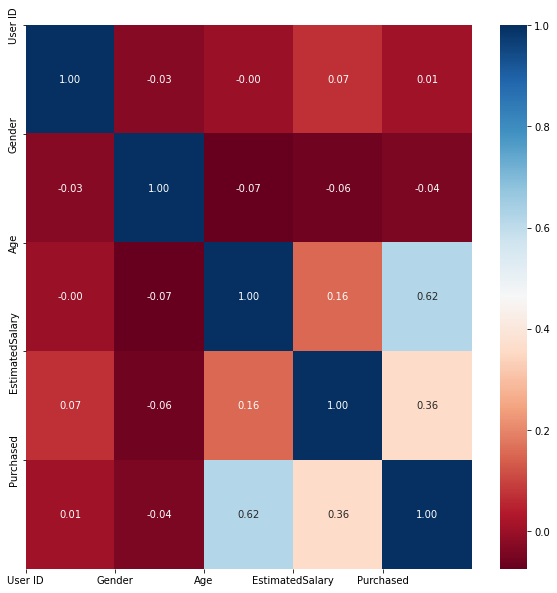

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

Dropping Age column as correlation between Age and Purchased represents non-linear relation.

**Splitting the dataset into the Training set and Test set**

In [ ]:
X = df[['Age', 'EstimatedSalary']].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=2)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Fitting K-NN to the Training set**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

nb_list = [2,3,4,5,6,7,8,9,10,15,20,30]
for nb in nb_list:
  knn=KNeighborsClassifier(n_neighbors=nb,algorithm='kd_tree')
  knn.fit(X_train,y_train)
  print('Neighbors= {}  train-score= {}  test-score= {}'.format(nb,knn.score(X_train,y_train),knn.score(X_test,y_test)))

Neighbors= 2  train-score= 0.921875  test-score= 0.85
Neighbors= 3  train-score= 0.925  test-score= 0.925
Neighbors= 4  train-score= 0.925  test-score= 0.8625
Neighbors= 5  train-score= 0.921875  test-score= 0.8875
Neighbors= 6  train-score= 0.915625  test-score= 0.875
Neighbors= 7  train-score= 0.928125  test-score= 0.9
Neighbors= 8  train-score= 0.9125  test-score= 0.875
Neighbors= 9  train-score= 0.915625  test-score= 0.9125
Neighbors= 10  train-score= 0.915625  test-score= 0.8875
Neighbors= 15  train-score= 0.90625  test-score= 0.9
Neighbors= 20  train-score= 0.9  test-score= 0.925
Neighbors= 30  train-score= 0.896875  test-score= 0.9


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

nb_list = [2,3,4,5,6,7,8,9,10,15,20,30]
for nb in nb_list:
  knn=KNeighborsClassifier(n_neighbors=nb,algorithm='kd_tree')
  knn.fit(X_train,y_train)
  print('Neighbors= {}  train-score= {}  test-score= {}'.format(nb,knn.score(X_train,y_train),knn.score(X_test,y_test)))

Neighbors= 2  train-score= 0.921875  test-score= 0.85
Neighbors= 3  train-score= 0.925  test-score= 0.925
Neighbors= 4  train-score= 0.925  test-score= 0.8625
Neighbors= 5  train-score= 0.921875  test-score= 0.8875
Neighbors= 6  train-score= 0.915625  test-score= 0.875
Neighbors= 7  train-score= 0.928125  test-score= 0.9
Neighbors= 8  train-score= 0.9125  test-score= 0.875
Neighbors= 9  train-score= 0.915625  test-score= 0.9125
Neighbors= 10  train-score= 0.915625  test-score= 0.8875
Neighbors= 15  train-score= 0.90625  test-score= 0.9
Neighbors= 20  train-score= 0.9  test-score= 0.925
Neighbors= 30  train-score= 0.896875  test-score= 0.9


In [ ]:
knn=KNeighborsClassifier(n_neighbors=3,algorithm='kd_tree')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)

**Predicting the Test set results**

In [ ]:
y_pred = knn.predict(X_test)

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        48
           1       0.93      0.88      0.90        32

    accuracy                           0.93        80
   macro avg       0.93      0.92      0.92        80
weighted avg       0.93      0.93      0.92        80

Confusion Matrix:
[[46  2]
 [ 4 28]]


**Evaluation Metric**

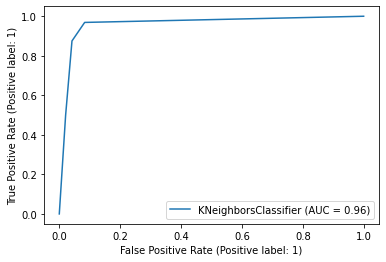

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
confusion_matrix(y_test,y_pred)
f1_score(y_test,knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
plot_roc_curve(knn, X_test, y_test) # plot_roc_curve(model,X_test,y_test) - Syntax : plot_roc_curve(model,fts_of_test, target_of_test)